In [22]:
import pandas as pd
from unidecode import unidecode
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns


In [27]:
# data = pd.read_csv('train.csv')
# data_test = pd.read_csv('test.csv')

# # Mostrar algunas filas para verificar
# print(data[['keyword', 'location', 'text']].head())

# # Verificar valores únicos en 'keyword' y 'location' después de la limpieza
# print("\nValores únicos en 'keyword':", data['keyword'].nunique())
# print("Valores únicos en 'location':", data['location'].nunique())

# # Mostrar algunas estadísticas sobre la longitud del texto después de la limpieza
# data['text_length'] = data['text'].str.len()
# print("\nEstadísticas de longitud del texto:")
# print(data['text_length'].describe())


  keyword location                                               text
0     NaN      NaN  Our Deeds are the Reason of this #earthquake M...
1     NaN      NaN             Forest fire near La Ronge Sask. Canada
2     NaN      NaN  All residents asked to 'shelter in place' are ...
3     NaN      NaN  13,000 people receive #wildfires evacuation or...
4     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...

Valores únicos en 'keyword': 221
Valores únicos en 'location': 3341

Estadísticas de longitud del texto:
count    7613.000000
mean      101.037042
std        33.780900
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64


In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rentt\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
# train = data.copy()

# # Convertir el texto a mayúsculas o a minúsculas
# train['keyword'] = train['keyword'].str.lower()
# train['location'] = train['location'].str.lower()
# train['text'] = train['text'].str.lower()

# # Quitar los caracteres especiales que aparecen como "#","@" o los apóstrofes.
# train['keyword'] = train['keyword'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
# train['location'] = train['location'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
# train['text'] = train['text'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

# # Quitar las url
# train['text'] = train['text'].str.replace(r'http\S+|www.\S+', '', regex=True)

# # Revisar si hay emoticones y quitarlos
# def remove_emojis(text):
#     emoji_pattern = re.compile("["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#         u"\U00002702-\U000027B0"
#         u"\U000024C2-\U0001F251"
#         "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', text)

# train['text'] = train['text'].apply(remove_emojis)

# # Quitar los signos de puntuación
# train['text'] = train['text'].str.replace(r'[^\w\s]', '', regex=True)

# # Quitar los artículos, preposiciones y conjunciones (stopwords)
# stop_words = set(stopwords.words('english'))
# train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# # Quitar números si considera que interferirán en la clasificación
# train['text'] = train['text'].str.replace(r'\b(?!911\b)\d+\b', '', regex=True)

# # Mostrar algunas filas para verificar
# print(train[['keyword', 'location', 'text']].head())

# # Verificar valores únicos en 'keyword' y 'location' después de la limpieza
# print("\nValores únicos en 'keyword':", train['keyword'].nunique())
# print("Valores únicos en 'location':", train['location'].nunique())

# # Mostrar algunas estadísticas sobre la longitud del texto después de la limpieza
# train['text_length'] = train['text'].str.len()
# print("\nEstadísticas de longitud del texto:")
# print(train['text_length'].describe())

train = pd.read_csv('train_cleaned.csv')

  keyword location                                               text
0     NaN      NaN       deeds reason earthquake may allah forgive us
1     NaN      NaN              forest fire near la ronge sask canada
2     NaN      NaN  residents asked shelter place notified officer...
3     NaN      NaN   people receive wildfires evacuation orders ca...
4     NaN      NaN  got sent photo ruby alaska smoke wildfires pou...

Valores únicos en 'keyword': 221
Valores únicos en 'location': 3233

Estadísticas de longitud del texto:
count    7613.000000
mean       64.894654
std        24.868745
min         3.000000
25%        46.000000
50%        66.000000
75%        84.000000
max       138.000000
Name: text_length, dtype: float64


In [28]:
# test = data_test.copy()

# # Convertir el texto a mayúsculas o a minúsculas
# test['keyword'] = test['keyword'].str.lower()
# test['location'] = test['location'].str.lower()
# test['text'] = test['text'].str.lower()

# # Quitar los caracteres especiales que aparecen como "#","@" o los apóstrofes.
# test['keyword'] = test['keyword'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
# test['location'] = test['location'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
# test['text'] = test['text'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

# # Quitar las url
# test['text'] = test['text'].str.replace(r'http\S+|www.\S+', '', regex=True)

# # Revisar si hay emoticones y quitarlos
# def remove_emojis(text):
#     emoji_pattern = re.compile("["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#         u"\U00002702-\U000027B0"
#         u"\U000024C2-\U0001F251"
#         "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', text)

# test['text'] = test['text'].apply(remove_emojis)

# # Quitar los signos de puntuación
# test['text'] = test['text'].str.replace(r'[^\w\s]', '', regex=True)

# # Quitar los artículos, preposiciones y conjunciones (stopwords)
# stop_words = set(stopwords.words('english'))
# test['text'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# # Quitar números si considera que interferirán en la clasificación
# test['text'] = test['text'].str.replace(r'\b(?!911\b)\d+\b', '', regex=True)

# # Mostrar algunas filas para verificar
# print(test[['keyword', 'location', 'text']].head())

# # Verificar valores únicos en 'keyword' y 'location' después de la limpieza
# print("\nValores únicos en 'keyword':", test['keyword'].nunique())
# print("Valores únicos en 'location':", test['location'].nunique())

# # Mostrar algunas estadísticas sobre la longitud del texto después de la limpieza
# test['text_length'] = test['text'].str.len()
# print("\nEstadísticas de longitud del texto:")
# print(test['text_length'].describe())

test = pd.read_csv('test_clean.csv')


  keyword location                                               text
0     NaN      NaN                        happened terrible car crash
1     NaN      NaN  heard earthquake different cities stay safe ev...
2     NaN      NaN  forest fire spot pond geese fleeing across str...
3     NaN      NaN              apocalypse lighting spokane wildfires
4     NaN      NaN               typhoon soudelor kills  china taiwan

Valores únicos en 'keyword': 221
Valores únicos en 'location': 1559

Estadísticas de longitud del texto:
count    3263.000000
mean       65.886914
std        25.132398
min         0.000000
25%        47.000000
50%        68.000000
75%        86.000000
max       125.000000
Name: text_length, dtype: float64


In [31]:
# test.to_csv('test_clean.csv', index=False)

In [21]:
# Separar tweets de desastres y no desastres
disaster_tweets = train[train['target'] == 1]['text']
non_disaster_tweets = train[train['target'] == 0]['text']

def get_word_freq(texts):
    words = ' '.join(texts).split()
    return Counter(words)

def get_ngram_freq(texts, n):
    all_ngrams = []
    for text in texts:
        tokens = text.split()
        all_ngrams.extend(ngrams(tokens, n))
    return Counter(all_ngrams)

# Obtener frecuencias de palabras
disaster_word_freq = get_word_freq(disaster_tweets)
non_disaster_word_freq = get_word_freq(non_disaster_tweets)

# Obtener frecuencias de bigramas y trigramas
disaster_bigrams = get_ngram_freq(disaster_tweets, 2)
disaster_trigrams = get_ngram_freq(disaster_tweets, 3)
non_disaster_bigrams = get_ngram_freq(non_disaster_tweets, 2)
non_disaster_trigrams = get_ngram_freq(non_disaster_tweets, 3)

# Imprimir las 10 palabras más frecuentes para cada categoría
print("Top 10 palabras en tweets de desastres:")
print(disaster_word_freq.most_common(10))
print("\nTop 10 palabras en tweets de no desastres:")
print(non_disaster_word_freq.most_common(10))

# Imprimir los 10 bigramas y trigramas más frecuentes para tweets de desastres
print("\nTop 10 bigramas en tweets de desastres:")
print(disaster_bigrams.most_common(10))
print("\nTop 10 trigramas en tweets de desastres:")
print(disaster_trigrams.most_common(10))


Top 10 palabras en tweets de desastres:
[('fire', 178), ('news', 136), ('via', 121), ('disaster', 117), ('california', 111), ('suicide', 110), ('police', 107), ('amp', 106), ('people', 105), ('killed', 93)]

Top 10 palabras en tweets de no desastres:
[('like', 253), ('im', 243), ('amp', 192), ('new', 168), ('get', 163), ('dont', 141), ('one', 127), ('body', 112), ('via', 99), ('would', 97)]

Top 10 bigramas en tweets de desastres:
[(('suicide', 'bomber'), 59), (('northern', 'california'), 41), (('oil', 'spill'), 38), (('burning', 'buildings'), 35), (('suicide', 'bombing'), 34), (('california', 'wildfire'), 34), (('bomber', 'detonated'), 30), (('confirmed', 'mh370'), 29), (('homes', 'razed'), 29), (('latest', 'homes'), 28)]

Top 10 trigramas en tweets de desastres:
[(('suicide', 'bomber', 'detonated'), 30), (('northern', 'california', 'wildfire'), 29), (('latest', 'homes', 'razed'), 28), (('homes', 'razed', 'northern'), 28), (('pkk', 'suicide', 'bomber'), 28), (('bomber', 'detonated', '

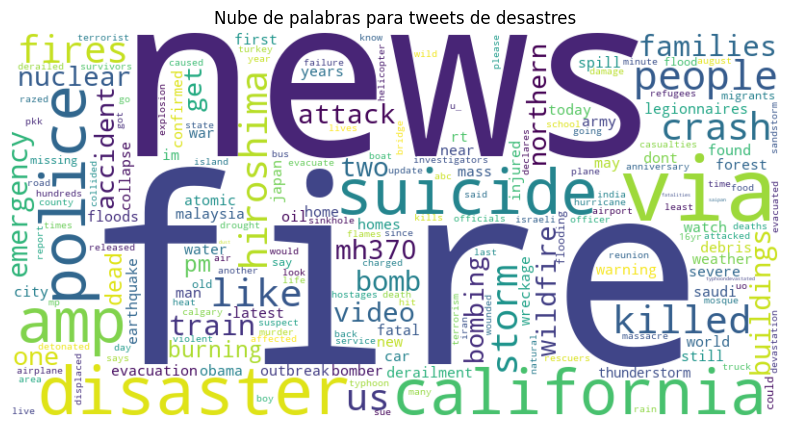

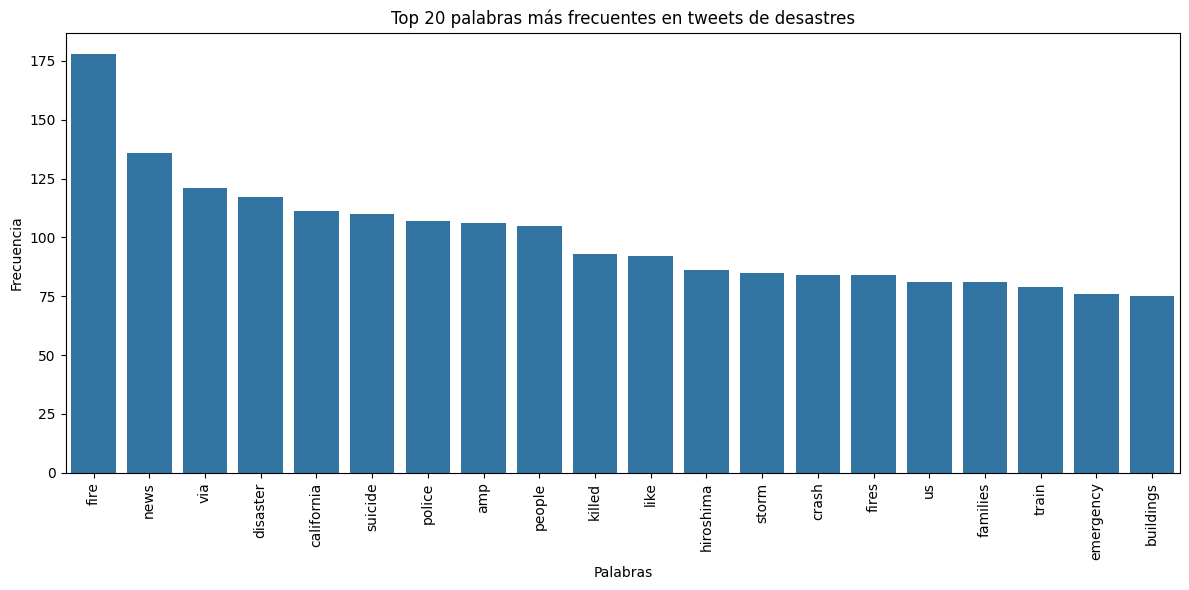

In [23]:
# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(disaster_word_freq)

# Plotear la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para tweets de desastres')
plt.show()

# Crear el histograma
top_words = dict(disaster_word_freq.most_common(20))
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()))
plt.xticks(rotation=90)
plt.title('Top 20 palabras más frecuentes en tweets de desastres')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline


In [30]:
X = train['text']
y = train['target']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Crear el vectorizador TF-IDF
tfidf = TfidfVectorizer(max_features=5000)

# Logistic Regression
lr_pipeline = Pipeline([
    ('tfidf', tfidf),
    ('model', LogisticRegression())
])
lr_pipeline.fit(X_train, y_train)
lr_pred = lr_pipeline.predict(X_test)

# Naive Bayes
nb_pipeline = Pipeline([
    ('tfidf', tfidf),
    ('model', MultinomialNB())
])
nb_pipeline.fit(X_train, y_train)
nb_pred = nb_pipeline.predict(X_test)

# Random Forest
rf_pipeline = Pipeline([
    ('tfidf', tfidf),
    ('model', RandomForestClassifier())
])
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)

# SVM
svm_pipeline = Pipeline([
    ('tfidf', tfidf),
    ('model', SVC())
])
svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)

# Neural Network
nn_pipeline = Pipeline([
    ('tfidf', tfidf),
    ('model', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500))
])
nn_pipeline.fit(X_train, y_train)
nn_pred = nn_pipeline.predict(X_test)

# Función para imprimir resultados
def print_results(name, y_true, y_pred):
    print(f"\nResultados para {name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Imprimir resultados para cada modelo
print_results("Logistic Regression", y_test, lr_pred)
print_results("Naive Bayes", y_test, nb_pred)
print_results("Random Forest", y_test, rf_pred)
print_results("SVM", y_test, svm_pred)
print_results("Neural Network", y_test, nn_pred)

print(classification_report(y_test, y_pred))



Resultados para Logistic Regression:
Accuracy: 0.8050

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       874
           1       0.82      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.80      0.80      1523


Resultados para Naive Bayes:
Accuracy: 0.8030

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.82      0.68      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523


Resultados para Random Forest:
Accuracy: 0.7814

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       874
           1  

In [34]:
X_test = test['text']

# Hacer predicciones
predicciones = lr_pipeline.predict(X_test)

# Añadir las predicciones al DataFrame test
test['target'] = predicciones

# Si necesitas las probabilidades de las predicciones, puedes obtenerlas así:
probabilidades = lr_pipeline.predict_proba(X_test)
test['probabilidad_desastre'] = probabilidades[:, 1]  # La probabilidad de la clase positiva (desastre)

# Mostrar las primeras filas del DataFrame con las predicciones
print(test.head())

# Si quieres guardar los resultados en un archivo CSV:
test.to_csv('predicciones_test.csv', index=False)


   id keyword location                                               text  \
0   0     NaN      NaN                        happened terrible car crash   
1   2     NaN      NaN  heard earthquake different cities stay safe ev...   
2   3     NaN      NaN  forest fire spot pond geese fleeing across str...   
3   9     NaN      NaN              apocalypse lighting spokane wildfires   
4  11     NaN      NaN               typhoon soudelor kills  china taiwan   

   text_length  target  probabilidad_desastre  
0           27       1               0.734618  
1           52       1               0.582779  
2           61       1               0.741451  
3           37       1               0.520280  
4           36       1               0.868494  


In [36]:
def clean_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()

    # Quitar caracteres especiales como "#", "@", o los apóstrofes
    text = unidecode(text)

    # Quitar URLs
    text = re.sub(r'http\S+|www.\S+', '', text)

    # Quitar emoticones
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Quitar signos de puntuación
    text = re.sub(r'[^\w\s]', '', text)

    # Quitar números, exceptuando 911
    text = re.sub(r'\b(?!911\b)\d+\b', '', text)

    # Quitar stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text


In [48]:
def clasificar_tweet(tweet, modelo=lr_pipeline):
    
    texto = clean_text(tweet)
    # Hacer la predicción
    prediccion = modelo.predict([texto])[0]
    probabilidad = modelo.predict_proba([texto])[0][1]
    
    # Interpretar el resultado
    if prediccion == 1:
        resultado = "Desastre"
    else:
        resultado = "No desastre"
    
    # Imprimir el resultado
    print(f"Tweet: '{tweet}'")
    print(f"Texto transformado: '{texto}'")
    print(f"Clasificación: {resultado}")
    print(f"Probabilidad de ser un desastre: {probabilidad:.2f}")
    
    return resultado, probabilidad

tweet_usuario = "911"
clasificar_tweet(tweet_usuario)
print()  # Línea en blanco para separar las clasificaciones

Tweet: '911'
Texto transformado: '911'
Clasificación: Desastre
Probabilidad de ser un desastre: 0.58

